# Analysis of transaction lifetimes

In [1]:
suppressMessages({
    require(RColorBrewer, quietly=TRUE)
    require(data.table, quietly=TRUE)
    require(ggplot2, quietly=TRUE)
    require(magrittr, quietly=TRUE)
})

## UTxO lifetime

In [2]:
uxtoLifetime <- fread("utxo-lifetime.tsv.gz", stringsAsFactors=TRUE)
colnames(uxtoLifetime) <- c("UTxO lifetime [slots]", "Number of UTxOs")
uxtoLifetime %>% summary

 UTxO lifetime [slots] Number of UTxOs  
 Min.   :        0     Min.   :      1  
 1st Qu.:  4811622     1st Qu.:      1  
 Median : 11924595     Median :      1  
 Mean   : 21135398     Mean   :     17  
 3rd Qu.: 27834878     3rd Qu.:      3  
 Max.   :171847831     Max.   :8297916  

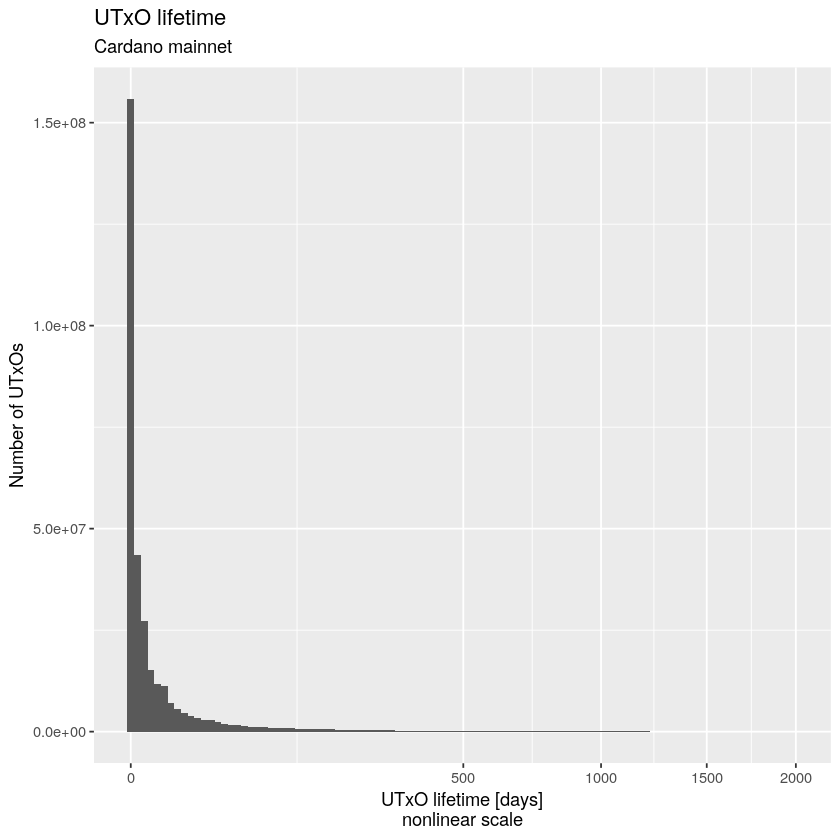

In [3]:
ggplot(uxtoLifetime, aes(x=`UTxO lifetime [slots]`/60/60/24, weight=`Number of UTxOs`)) +
    geom_histogram(bins=100) +
    scale_x_sqrt() +
    xlab("UTxO lifetime [days]\nnonlinear scale") +
    ylab("Number of UTxOs") +
    ggtitle("UTxO lifetime", "Cardano mainnet")

In [4]:
ggsave("utxo-lifetime-sqrt.png", units="in", dpi=150, width=8, height=6)

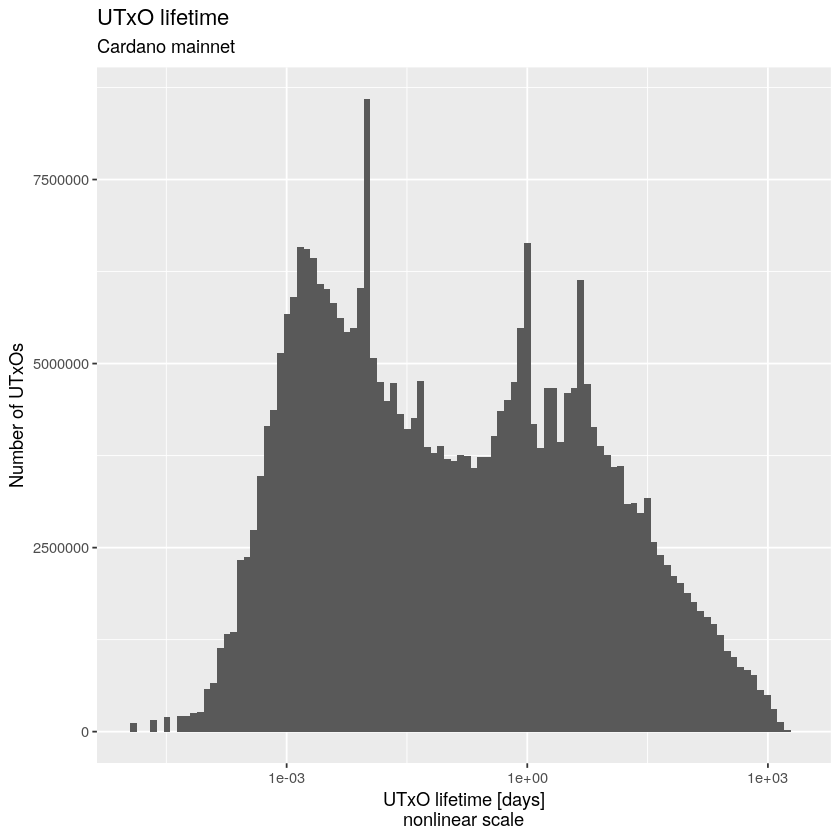

In [5]:
ggplot(uxtoLifetime[`UTxO lifetime [slots]` > 0], aes(x=`UTxO lifetime [slots]`/60/60/24, weight=`Number of UTxOs`)) +
    geom_histogram(bins=100) +
    scale_x_log10() +
    xlab("UTxO lifetime [days]\nnonlinear scale") +
    ylab("Number of UTxOs") +
    ggtitle("UTxO lifetime", "Cardano mainnet")

In [6]:
ggsave("utxo-lifetime-log10.png", units="in", dpi=150, width=8, height=6)

## Size of UTxO set

In [7]:
utxoSet <- fread("utxo-set.tsv.gz", stringsAsFactors=TRUE)
colnames(utxoSet) <- c("Slot", "Number of transactions in active UTxO set")
utxoSet %>% summary

      Slot           Number of transactions in active UTxO set
 Min.   :        0   Min.   :   14505                         
 1st Qu.: 26867645   1st Qu.: 1863681                         
 Median : 73854042   Median : 8682092                         
 Mean   : 75371115   Mean   : 6809438                         
 3rd Qu.:121408752   3rd Qu.:10996423                         
 Max.   :172206016   Max.   :11272210                         

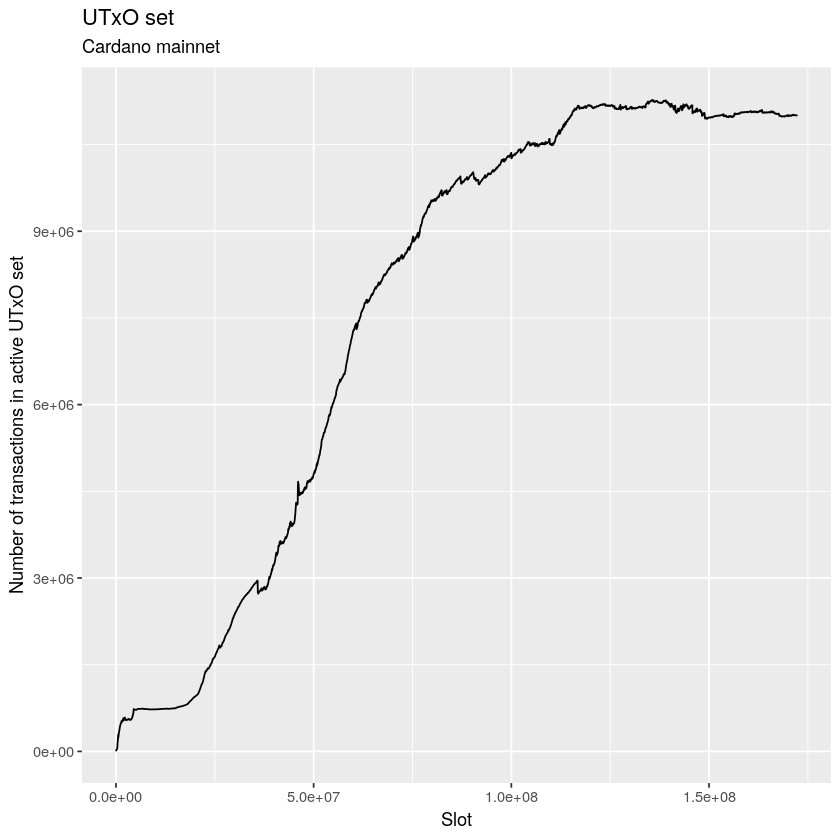

In [8]:
ggplot(utxoSet, aes(x=`Slot`, y=`Number of transactions in active UTxO set`)) +
    geom_line() +
    ggtitle("UTxO set", "Cardano mainnet")

In [9]:
ggsave("utxo-set.png", units="in", dpi=150, width=8, height=6)